In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams_measures import *


In [2]:
df = pd.read_excel("../data/Ñuble.xls")
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
i_data = df["Contagiados"].values
df = df[df.Contagiados > 50]

In [3]:
df

,Unnamed: 0,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Fecha_dt
8,9,Ñuble,57,0,0,57,3/20/2020,2020-03-20
9,10,Ñuble,66,0,0,66,3/21/2020,2020-03-21
10,11,Ñuble,93,0,0,93,3/22/2020,2020-03-22
11,12,Ñuble,107,0,0,107,3/23/2020,2020-03-23
12,13,Ñuble,112,0,0,112,3/24/2020,2020-03-24
13,14,Ñuble,120,0,0,120,3/25/2020,2020-03-25
14,15,Ñuble,150,0,1,149,3/26/2020,2020-03-26
15,16,Ñuble,184,0,3,181,3/27/2020,2020-03-27
16,17,Ñuble,199,0,4,195,3/28/2020,2020-03-28
17,18,Ñuble,232,0,10,222,3/29/2020,2020-03-29


In [26]:
i_cuar = 10
i_cuar = 14

t_data = np.arange(len(df.Infectados_Actuales))
C_real = df.Contagiados.values
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values + df.Muertes.values



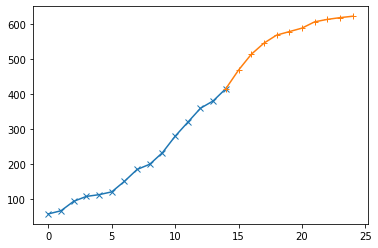

In [27]:
plt.plot(t_data[:i_cuar+1], C_real [:i_cuar+1], marker = "x")
plt.plot(t_data[i_cuar:], C_real [i_cuar:], marker = "+")


In [28]:
pop = 511551

# Ajuste a primeros días
r0 =  19 
e0 =  22 
i0 =  31

s0 = pop - i0 - r0 - e0
c0 = C_real[0]


4.895477023965976e-07
0.6871168953272974 
0.05555556343557843 
56.08000441355646 
0.09999472332437251 
0.3856258452621279

In [29]:
min_ = GridSearchSEIR_exams_measures (t_data, s0, e0, i0, r0, c0, c0, C_real, i_dates_betas = [i_cuar],
                                      transmission_coeffs = [[4e-7, 5e-7, 7e-7], [7e-15, 8e-15, 9e-15, 1e-14, 2e-14, 3e-14]], # 1 / day person                                                              
                                      latency_time = np.arange(1., 7., 1.), # days                                                                                                               
                                      infectious_time = np.arange(6., 18, 2.), # days                                                                                                            
                                      ks = 10**np.linspace(-2, 0, 5),
                                      a_dates = np.linspace (20, 80, 5),
                                      a_s = np.linspace(0.0, 1., 11), backward = True)


{'b0': [4e-07, 5e-07, 7e-07], 'b1': [7e-15, 8e-15, 9e-15, 1e-14, 2e-14, 3e-14]}
betas =  [4.e-07 7.e-15] 23.88540506362915
  min: RMSE =  54.54546441249288 ; b, s, g =  [array([4.e-07, 7.e-15]), 1.0, 0.0625] ; a_d, k, a =  [20.0, 0.01, 1.0] ; ( 1.0 ,  16.0 )
betas =  [4.e-07 8.e-15] 35.63375687599182
  min: RMSE =  54.5391322163047 ; b, s, g =  [array([4.e-07, 8.e-15]), 1.0, 0.0625] ; a_d, k, a =  [20.0, 0.01, 1.0] ; ( 1.0 ,  16.0 )
betas =  [4.e-07 9.e-15] 35.617844104766846
  min: RMSE =  54.5391322163047 ; b, s, g =  [array([4.e-07, 8.e-15]), 1.0, 0.0625] ; a_d, k, a =  [20.0, 0.01, 1.0] ; ( 1.0 ,  16.0 )
betas =  [4.e-07 1.e-14] 23.166414737701416
  min: RMSE =  54.5391322163047 ; b, s, g =  [array([4.e-07, 8.e-15]), 1.0, 0.0625] ; a_d, k, a =  [20.0, 0.01, 1.0] ; ( 1.0 ,  16.0 )
betas =  [4.e-07 2.e-14] 33.846271991729736
  min: RMSE =  54.5391322163047 ; b, s, g =  [array([4.e-07, 8.e-15]), 1.0, 0.0625] ; a_d, k, a =  [20.0, 0.01, 1.0] ; ( 1.0 ,  16.0 )
betas =  [4.e-07 3.e-14] 3

In [30]:
RMSE, betas_g, sigma_g, gamma_g, a_date_g, k_g, a_g = min_
print (min_, 1./sigma_g, 1/gamma_g)

[8.486029477192394, array([7.e-07, 1.e-14]), 0.5, 0.125, 50.0, 0.1, 0.4] 2.0 8.0


In [31]:
ts = np.arange (0, 100, 1)
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(ts), dtype = float)])

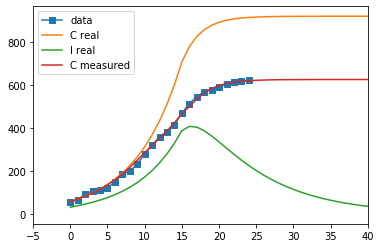

In [32]:

S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar], betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (t_data, C_real, label = "data", marker = "s")
plt.plot (ts, C_c_g, label = "C real")
plt.plot (ts, I_c_g, label = "I real")
plt.plot (ts, C_m_g, label = "C measured")
plt.plot ()
plt.xlim(-5, 40)
plt.legend()


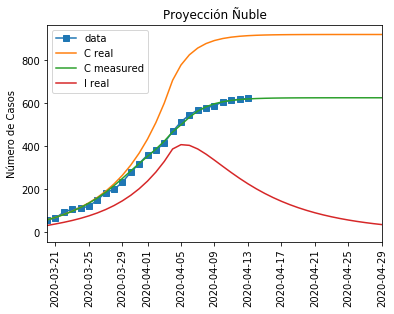

In [33]:
ts = np.arange (0, 100, 1)
S_c_g, E_c_g, I_c_g, R_c_g, C_c_g, C_m_g = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar], betas_g, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g, label = "C real")
plt.plot (x_plot_proy, C_m_g, label = "C measured")
plt.plot (x_plot_proy, I_c_g, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[40])
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()

In [34]:
print (np.sqrt(((C_real-C_m_g[:len(C_real)])**2).mean()))

8.486029477192394


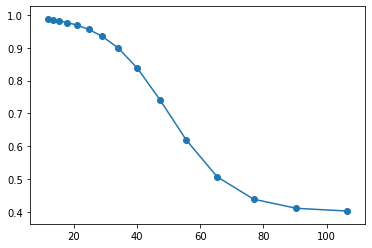

In [35]:
dC_c_g = C_c_g [1:16] - C_c_g[:15]
dC_m_g = C_m_g [1:16] - C_m_g[:15]
a__ = dC_m_g/dC_c_g
alphas = 1 + (a_g-1)/(1+np.exp(-k_g*(dC_c_g-a_date_g)))
plt.plot (dC_c_g, alphas)

plt.scatter (dC_c_g, a__)

In [39]:
print(betas_g)
betas_g2 =np.array([7.e-7, 1.e-14, 7.e-7])

[7.e-07 1.e-14]


In [40]:
S_c_g2, E_c_g2, I_c_g2, R_c_g2, C_c_g2, C_m_g2 = SEIR_exams_measures_backward(ts, s0, e0, i0, r0, c0, c0, 
                                                            [i_cuar, 30], betas_g2, sigma_g, gamma_g, 
                                                            a_date_g, k_g, a_g)

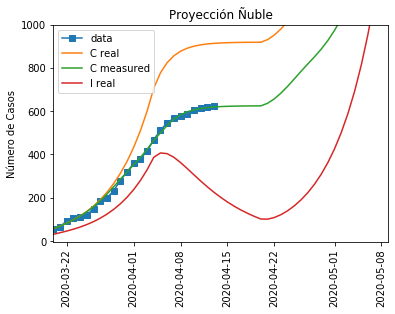

In [45]:
plt.plot (x_plot_data, C_real, label = "data", marker = "s")
plt.plot (x_plot_proy, C_c_g2, label = "C real")
plt.plot (x_plot_proy, C_m_g2, label = "C measured")
plt.plot (x_plot_proy, I_c_g2, label = "I real")
plt.plot ()
plt.xlim (x_plot_proy[0], x_plot_proy[50])
plt.ylim (-5, 1000)
plt.xticks(rotation = 90)
plt.ylabel ("Número de Casos")
plt.title ("Proyección Ñuble")
plt.legend()